In [40]:
# python 3.10.14
import seaborn as sns # 0.13.2
import matplotlib.pyplot as plt # 3.8.4
import numpy as np  # 1.23.2
import pandas as pd # 2.2.2


# to make this notebook's output stable across runs (still not fully deterministic)
SEED = 42
np.random.seed(SEED)


In [41]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Define the colors for the plots
BACKGROUND_COL = '#F2F2F2'
AXIS_COLOR     = '#BEBEBE' 
LINES_COLOR    = '#BEBEBE'
sns.set_style("whitegrid", {'grid.linestyle': '--',
                            'grid.color': LINES_COLOR,
                            'axes.edgecolor': AXIS_COLOR,
                            'axes.facecolor':BACKGROUND_COL,
                            'figure.facecolor':BACKGROUND_COL,
                            })
plt.rcParams['axes.facecolor'] = BACKGROUND_COL

%matplotlib inline
%config InlineBackend.figure_format='retina' 

### Data downloading

In [42]:
#! mkdir -p data
#! wget "https://archive.ics.uci.edu/static/public/915/differentiated+thyroid+cancer+recurrence.zip"
#! unzip *.zip -d ./data
#! rm -f *.zip

In [43]:
DATA = pd.read_csv('./data/Thyroid_Diff.csv')
# check nan in dataframe
assert DATA.isna().sum().sum() == 0
DATA.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
DATA['N'].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

In [63]:
# order the stage column
custom_order = ['I', 'II', 'III', 'IVA', 'IVB']
DATA['Stage'] = pd.Categorical(DATA['Stage'], categories=custom_order, ordered=True)
# order the N column
custom_order = ['N0', 'N1a', 'N1b',]
DATA['N'] = pd.Categorical(DATA['N'], categories=custom_order, ordered=True)

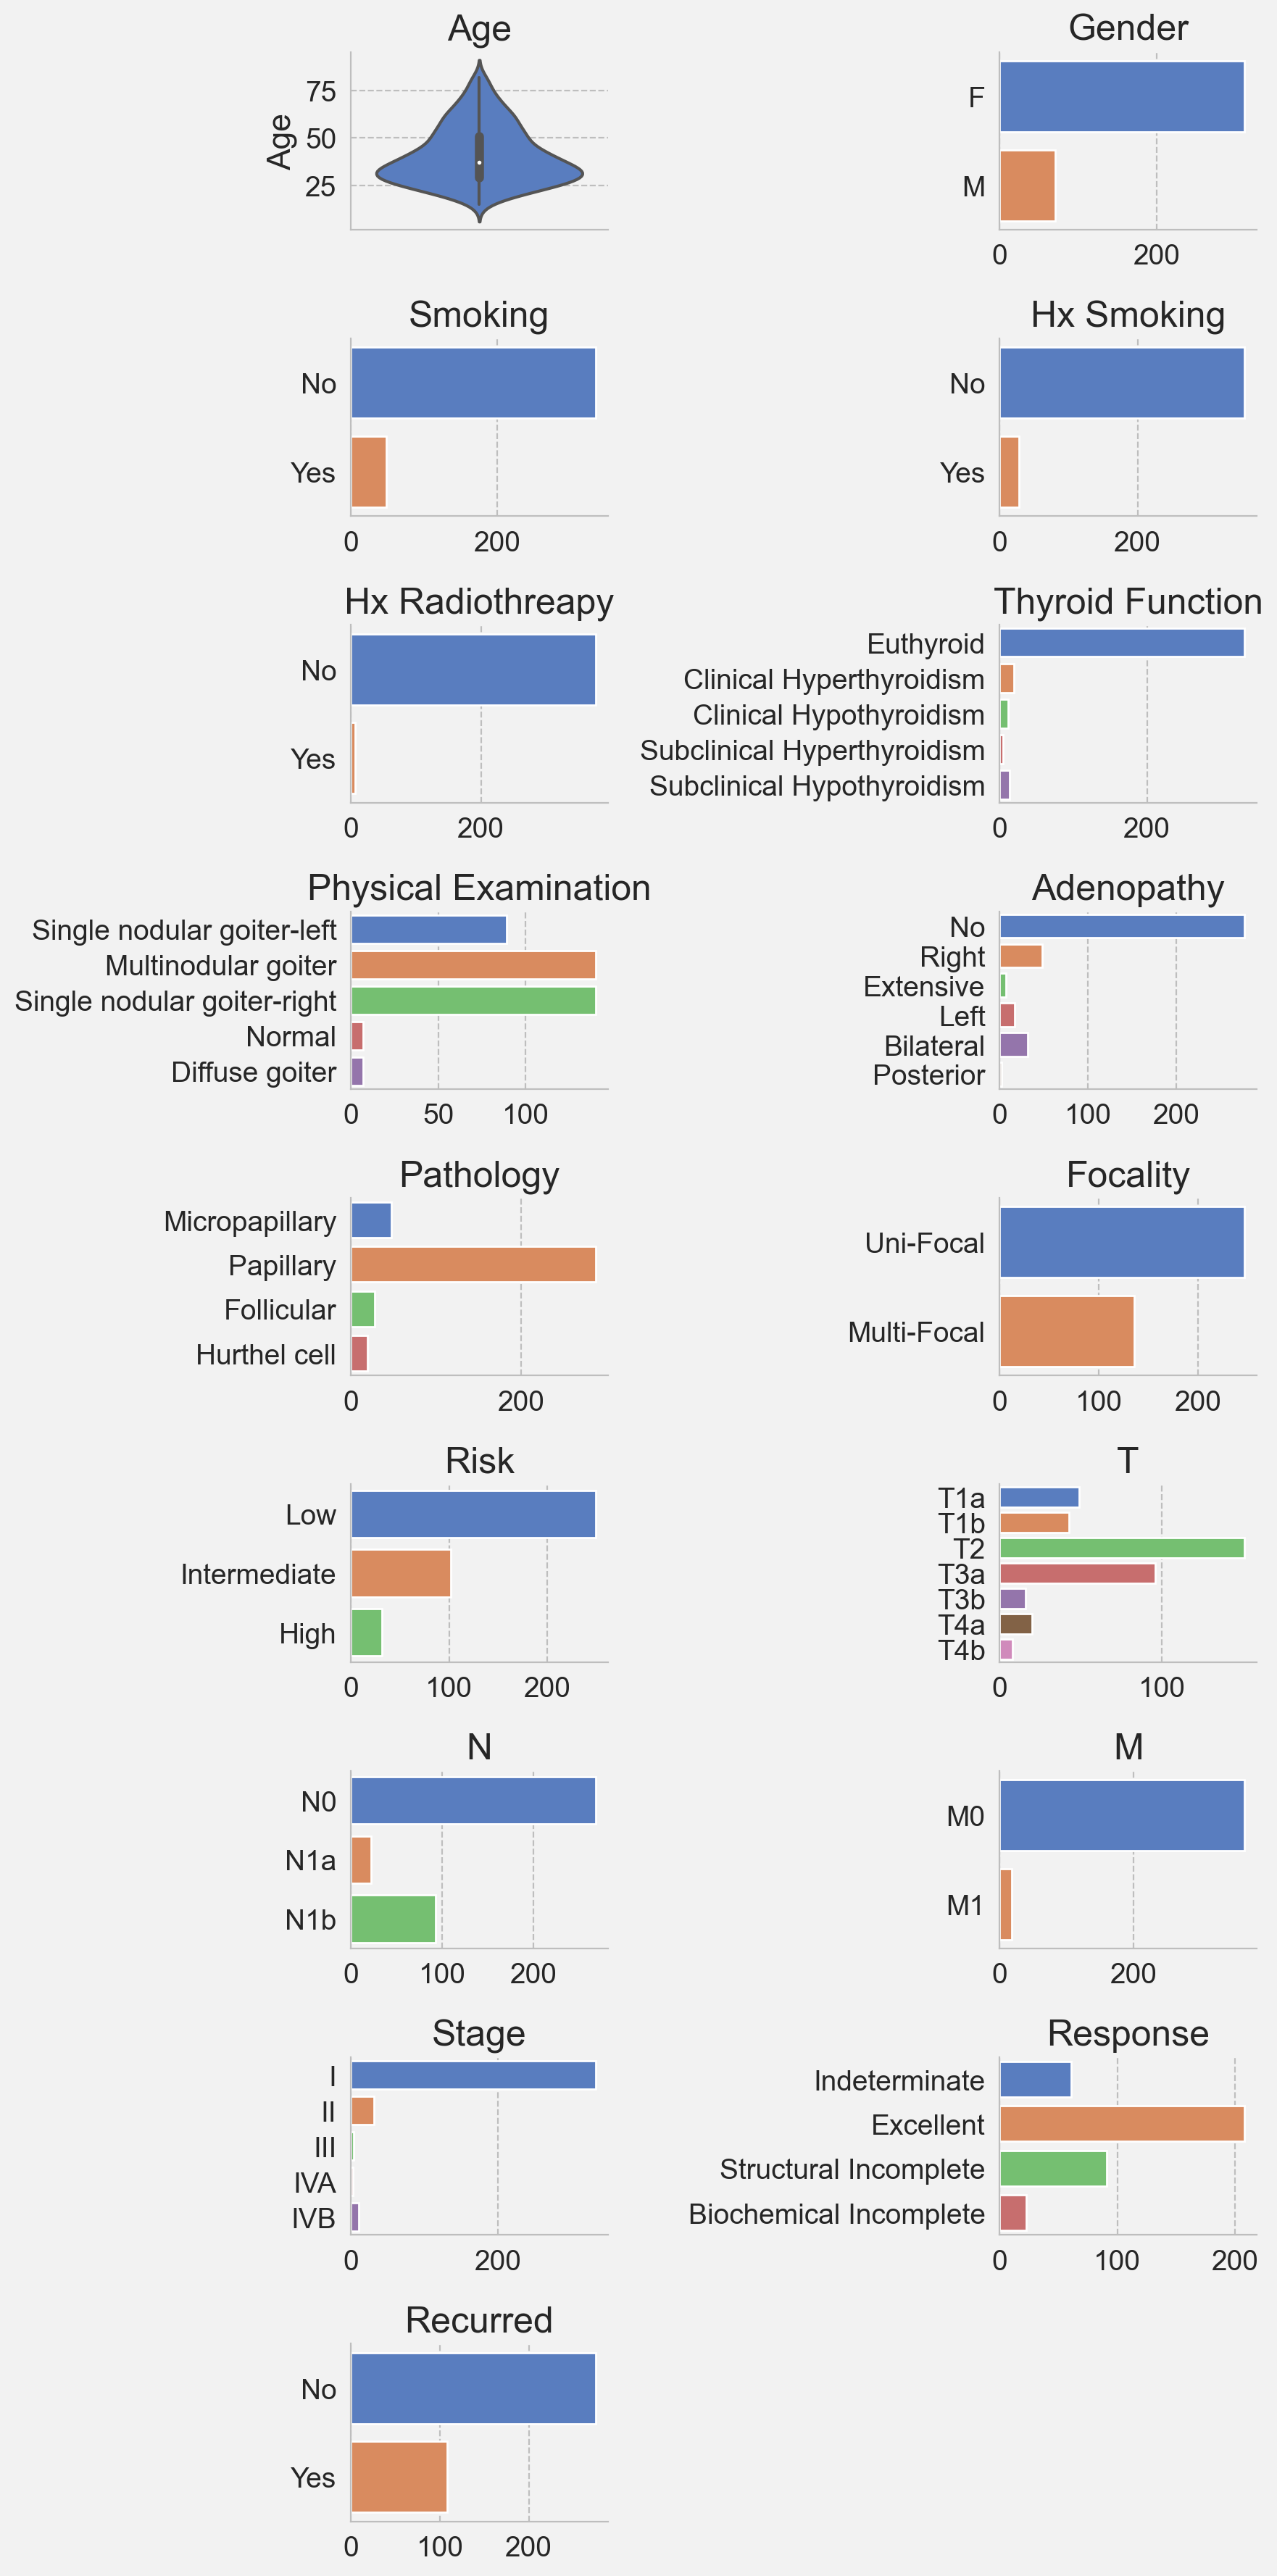

In [70]:


# Detect categorical and numeric columns
categorical_cols = DATA.select_dtypes(include=["object", "category"]).columns
numeric_cols = DATA.select_dtypes(include=["number"]).columns

# Initialize grid layout
n_cols = 2  # Number of columns in the grid
n_rows = int(np.ceil(len(DATA.columns) / n_cols))  # Calculate rows based on number of columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 2 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and create the appropriate plot
for idx, col in enumerate(DATA.columns):
    ax = axes[idx]  # Get the axis to plot on

    # Categorical columns: Bar plots
    if col in categorical_cols:
        sns.countplot(data=DATA, y=col, palette="muted", ax=ax)
        ax.set_title(col)
        ax.set_ylabel("")

    # Numeric columns: Violin plots
    elif col in numeric_cols:
        sns.violinplot(data=DATA, y=col, palette="muted", ax=ax)
        ax.set_title(col)

    # Hide x-axis for numeric plots (only used for categorical)
    #if col in numeric_cols:
    ax.set_xlabel("")

# Hide any unused subplots in the grid
for idx in range(len(DATA.columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and spacing
sns.despine()
plt.tight_layout()
plt.show()